In [145]:
import pandas as pd
import numpy as np
from sklearn import preprocessing as pp

# parse features and labels for train and test data
def parse_data(fpath):
    return pd.read_csv(fpath, header=None)
#     features = df.iloc[:,1:]
#     labels = df.iloc[:,0]
#     print(features, labels)
#     return np.array(features), np.array(labels)

train_feat_path = 'data/features_train/features_resnet1000_train.csv'
test_feat_path = 'data/features_test/features_resnet1000_test.csv'

train_features = parse_data(train_feat_path)
test_features = parse_data(test_feat_path)

In [146]:
import glob
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

# preprocess descriptions to remove noises
def preprocess_descriptions(fpath):
    lmt = WordNetLemmatizer()
    stemmer = PorterStemmer()
    descriptions = {}
    
    for fname in glob.glob(fpath):
        file = open(fname, 'r')
        desc = file.read()
        desc = np.char.lower(desc)

        # replace punctuations in each set of descriptions
        desc = re.sub('[^\w\s]', ' ' , str(desc))

        words = []
        for i, word in enumerate(desc.split()):
            # if not stopword, lemmatize and stem word
            if word not in stopwords.words('english'):
                word = lmt.lemmatize(word)
                words.append(stemmer.stem(word))
        description = ' '.join(words)
        image_idx = int(fname.split('/')[-1].split('.')[0])
        descriptions[image_idx] = description
    return descriptions

train_desc_fpath = 'data/descriptions_train/*.txt'
test_desc_fpath = 'data/descriptions_test/*.txt'

train_desc = preprocess_descriptions(train_desc_fpath)
test_desc = preprocess_descriptions(test_desc_fpath)

KeyboardInterrupt: 

In [ ]:
# print (test_desc)

In [330]:
def parse_tags(fpath):
    tags = {}
    for fname in glob.glob(fpath):
        file = open(fname, 'r')
        lines = []
        for line in file:
            # replace punctuations in each set of descriptions
            line = line.replace('\n', '').replace('\r', '')
            line = re.sub('[^\w\s]', ' ' , line)
#             line = ' '.join(line)
            lines.append(line)
        image_idx = int(fname.split('/')[-1].split('.')[0])   
        tags[image_idx] = ' '.join(lines)
    return tags 
        

train_tags_path = 'data/tags_train/*.txt'
test_tags_path = 'data/tags_test/*.txt'

train_tags = parse_tags(train_tags_path)
test_tags = parse_tags(test_tags_path)

In [333]:
print (train_tags[0])

vehicle airplane outdoor bench sports skateboard person person vehicle truck accessory backpack accessory handbag furniture dining table


In [208]:
large_word_dict = {}
# create dictionary based on train set
def create_word_dict():
    
    #build a list of words from train descriptions
    for int, desc in train_desc.items():
        for word in desc.split():
            if word in large_word_dict:
                large_word_dict[word] += 1
            else:
                large_word_dict[word] = 1
                
    for int, desc in test_desc.items():
        for word in desc.split():
            if word in large_word_dict:
                large_word_dict[word] += 1
            else:
                large_word_dict[word] = 1
    
                        
create_word_dict()

In [331]:
tag_word_dict = {}
# create dictionary based on train set
def create_tag_word_dict():
    
    #build a list of words from train descriptions
    for int, desc in train_tags.items():
        for word in desc.split():
            if word in tag_word_dict:
                tag_word_dict[word] += 1
            else:
                tag_word_dict[word] = 1
                
    for int, desc in test_tags.items():
        for word in desc.split():
            if word in tag_word_dict:
                tag_word_dict[word] += 1
            else:
                tag_word_dict[word] = 1
    
                        
create_tag_word_dict()

In [332]:
print (tag_word_dict)

{'indoor': 1871, 'teddy': 220, 'bear': 316, 'animal': 2625, 'cat': 420, 'electronic': 2022, 'cell': 515, 'phone': 515, 'person': 12770, 'accessory': 2261, 'handbag': 702, 'furniture': 3977, 'dining': 1152, 'table': 1152, 'kitchen': 3747, 'knife': 400, 'food': 1985, 'carrot': 165, 'book': 543, 'wine': 254, 'glass': 254, 'fork': 321, 'cake': 262, 'chair': 1231, 'pizza': 324, 'umbrella': 430, 'outdoor': 1373, 'stop': 157, 'sign': 157, 'sports': 3267, 'kite': 246, 'giraffe': 264, 'potted': 438, 'plant': 438, 'appliance': 1184, 'refrigerator': 251, 'bowl': 706, 'apple': 137, 'orange': 154, 'microwave': 142, 'oven': 294, 'toaster': 28, 'spoon': 335, 'sink': 469, 'vase': 385, 'vehicle': 3927, 'train': 391, 'motorcycle': 381, 'bottle': 849, 'bed': 385, 'boat': 327, 'tv': 443, 'remote': 288, 'zebra': 203, 'tennis': 347, 'racket': 347, 'skis': 301, 'suitcase': 229, 'backpack': 530, 'snowboard': 155, 'dog': 617, 'banana': 208, 'keyboard': 211, 'mouse': 194, 'sheep': 149, 'broccoli': 201, 'scissor

In [206]:
from sklearn import preprocessing as pp

# build bag of words for test and train descriptions
word_dict = {}
def build_bag_of_words(path, thresh):

    index = 0
    
#     word_dict = large_word_dict
    
    for w in large_word_dict:
        if large_word_dict[w] > thresh:
            word_dict[w] = index
            index += 1  
    
    des_vec = {}
    
    for ind, desc in path.items():
        # Lemmatize and remove stop words
        cur = [0.] * len(word_dict)
#         print (desc.split())
        for word in desc.split():
            if word in word_dict:
#            print ("success")
                cur[word_dict[word]] += 1.
#             try:
                
#             except:
#                 pass
        des_vec[ind] = cur
#         print (len(cur))
#         des_vec = pp.normalize(des_vec, norm='l2')
    for k, v in des_vec.items():
        post = pp.normalize(np.array(v).reshape(1, -1), norm='l2')
        des_vec[k] = post.flatten()
    return des_vec

train_desc_features = build_bag_of_words(train_desc, 0)
test_desc_features = build_bag_of_words(test_desc, 0)

In [334]:
from sklearn import preprocessing as pp

# build bag of words for test and train descriptions
tag_dict ={}
def build_tag_bag_of_words(descriptions):
    index = 0
    
    for w in tag_word_dict:
        tag_dict[w] = index
        index += 1  
            
#     word_dict = large_word_dict
    
    des_vec = {}
    
    for ind, desc in descriptions.items():
        # Lemmatize and remove stop words
        cur = [0.] * len(tag_dict)
#         print (cur)
#         print (len(tag_word_dict))
        for word in desc.split():
            if word in tag_dict:
#            print ("success")
                print 
                cur[tag_dict[word]] += 1.
#             try:
                
#             except:
#                 pass
        des_vec[ind] = cur
#         print (len(cur))
#         des_vec = pp.normalize(des_vec, norm='l2')
    for k, v in des_vec.items():
        post = pp.normalize(np.array(v).reshape(1, -1), norm='l2')
        des_vec[k] = post.flatten()
    return des_vec

train_tag_features = build_tag_bag_of_words(train_tags)
test_tag_features = build_tag_bag_of_words(test_tags)

In [278]:
# print (len(train_desc_features)) 
# print (train_desc_features[0]) 

In [335]:
print (len(test_tag_features))

2000


In [11]:
# from sklearn import preprocessing as pp

# def post_process_descriptions(desc_feat):
#     for k, v in desc_feat:
#         post = pp.normalize(np.array(v).reshape(1, -1), norm='l2')
#         desc_feat[k] = post.flatten()

# post_process_descriptions(train_desc_features)
# post_process_descriptions(test_desc_features)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=1)
train_input, train_output = [], []

for idx in train_desc_features:
    train_input.append(train_desc_features[idx])
    train_output.append(idx)
    
train_input = np.array(train_input)
train_output = np.array(train_output)

knn.fit(train_input, train_output)

In [41]:
# build dictionary of train labels to train features
tf_dict = {}
def map_train_labels_to_features():
    tf = train_features.as_matrix()
    for i  in range(len(tf)):
#         print (tf)
        name = int(tf[i][0].split("/")[1].split(".")[0])
#         print (name)
        tf_dict[name] = np.array(tf[i][1:], dtype=float)

map_train_labels_to_features()

In [42]:
# print (tf_dict)

In [ ]:
import scipy as sp

def get_dist(feat1, feat2):
    dist = sp.spatial.distance.cdist(feat1.reshape(1, -1), feat2.reshape(1, -1), 'euclidean').flatten()
    return dist[0]


def get_dist2(feat1, feat2):
    dist = sp.spatial.distance.cdist(feat1.reshape(1, -1), feat2.reshape(1, -1), 'cosine').flatten()
    return dist[0]

In [355]:
import operator

def get_top_20(des):
    # for each test description feature, predict the most similar train image based on KNN
    desc = np.array(test_desc_features[des])
    
#     pred = knn.predict(desc.reshape(1, -1))[0]
#     print (pred)
#     pred_int = int(pred[0].split(".")[0])
    desc_feat_score = {}
    for index, train in train_desc_features.items():
        #print(tf_test[1:], tf_train)
        score = get_dist(train, desc)
        desc_feat_score[index] = score
        
    sorted_desc_feat_score = sorted(desc_feat_score.items(), key=operator.itemgetter(1))
    
#     pred = sorted_desc_feat_score[0][0]
    pred = []
    for i in range(5):
        pred.append(sorted_desc_feat_score[i][0])
#         res.append

    features = [];
    for i in pred :
#         print (train_desc[i])
        features.append(tf_dict[i])
#         print(train_desc[i])
#     print (features)
    
    # get train desc feature from train image
    tf_train = np.mean(features, axis=0)
#     print (tf_train)
#     print (tf_train)

    feat_score = {}
    res = []
    
#     print (test_features.as_matrix())

#     for each test feature, compute distance to train feature to select closest 20

    for tf_test in test_features.as_matrix():
        name = tf_test[0,].split("/")[1]
        #print(tf_test[1:], tf_train)
        score = 100000000000000000;
#         print (tf_test)
#         print (name)
#         print (len(test_tag_features))
        id_int = int(name.split(".")[0])
#         print (id_int)
        
        testing  = np.concatenate((tf_test[1:],test_tag_features[id_int]),axis=0)
        for ind, k in enumerate(features):
            pred_k = int(pred[ind])
            train = np.concatenate((k,train_tag_features[pred_k]),axis=0)
            score2 = get_dist(testing, train)
#             score2 = get_dist(tf_test[1:], k)
            if (score2 < score):
                score = score2
        feat_score[name] = score

    sorted_feat_score = sorted(feat_score.items(), key=operator.itemgetter(1))
#     print (sorted_feat_score)
    for i in range(20):
        res.append(sorted_feat_score[i][0])
    return np.array(res)

[ -1.33794948e+00  -2.32838740e+00  -1.46949267e+00  -1.58148838e+00
  -9.20167053e-01  -3.70921481e-01  -1.88984210e+00   1.42052892e+00
  -1.53384860e+00   1.52453920e+00  -2.30887750e+00  -3.48793716e+00
  -3.15979352e+00  -4.18800416e+00  -3.74616055e+00  -2.17548554e+00
  -1.17692686e+00  -4.32078357e+00  -2.47978827e+00  -3.50326869e+00
  -3.37940047e+00   1.43040058e-01  -2.52824621e+00  -7.63644826e-01
  -4.35186691e+00  -2.29175309e+00  -1.71890123e+00  -3.21805727e+00
  -3.08222311e+00  -1.41627332e+00  -2.91333852e+00  -4.11953855e+00
  -2.24254055e+00   9.53254960e-03   1.21255827e-01  -1.53587229e+00
  -1.72661990e-01  -3.63290291e+00  -6.37678683e-01  -1.00335632e+00
  -2.95543480e+00  -7.48022823e-01  -2.23704453e+00  -4.65334609e-01
  -2.38775961e+00  -1.98770766e+00  -3.61744184e+00  -8.46267349e-01
  -1.73298414e+00  -1.57545080e+00  -3.33816829e+00   1.53143486e+00
  -1.20487041e+00  -2.61598072e+00  -1.56656755e+00  -2.76614950e+00
  -3.50441232e+00  -3.18343625e+00

two mean uniform ride hors side side sandi beach two polic offic hors ride beach two peopl ride hors middl lot pair polic offic ride hors beach two peopl neon vest ride hors beach


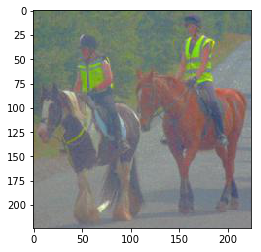

In [356]:
number = get_top_20(3)
print (test_desc[3])
# print (train_desc[6828])
# print (train_desc[7169])
# print (train_desc[7621])

img = Image.open('data/images_train/6828.jpg')
img = np.asarray(img)
plt.imshow(img)
plt.show()


woman walk street past doorway woman walk past doorway sidewalk woman talk cell phone check watch woman talk cell phone check watch walk sidewalk woman wear blue phone walk along sidewalk front build black planter side entranc
0 ['1980.jpg' '309.jpg' '305.jpg' '829.jpg' '222.jpg' '46.jpg' '105.jpg'
 '1396.jpg' '1883.jpg' '669.jpg' '1850.jpg' '1581.jpg' '749.jpg' '732.jpg'
 '1413.jpg' '106.jpg' '1992.jpg' '1553.jpg' '52.jpg' '1053.jpg']


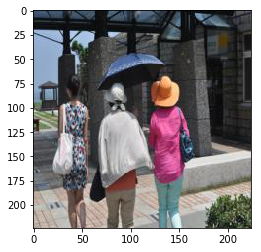

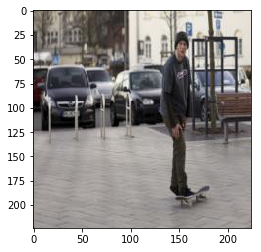

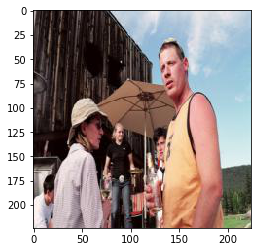

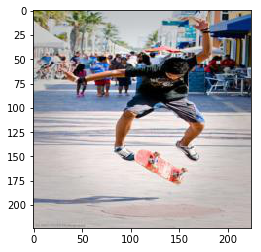

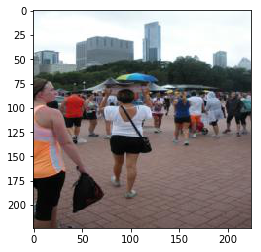

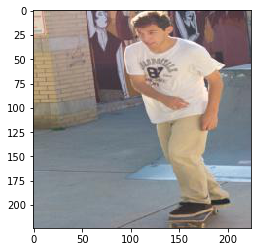

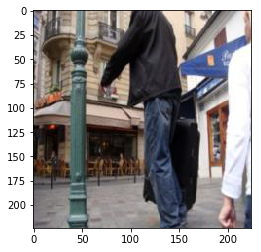

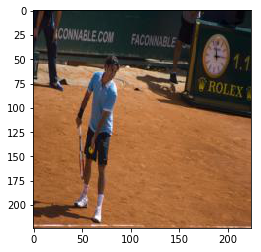

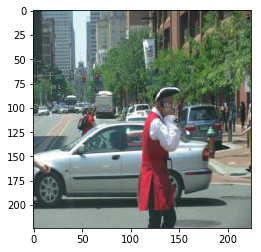

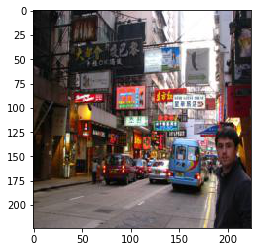

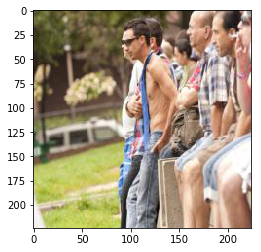

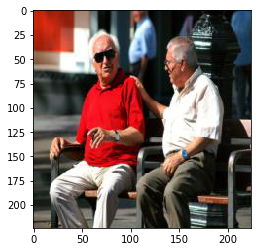

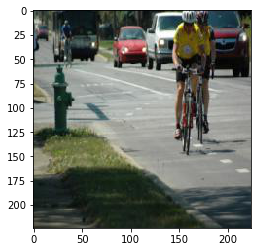

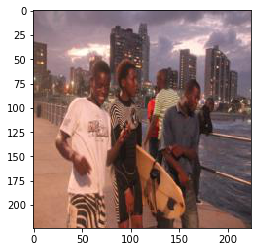

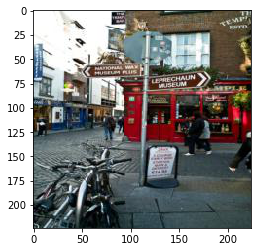

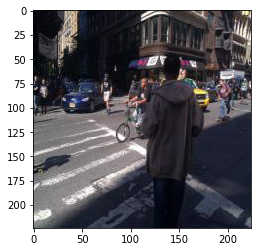

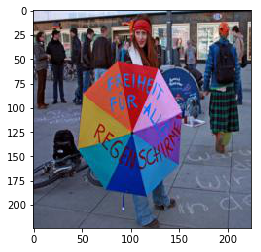

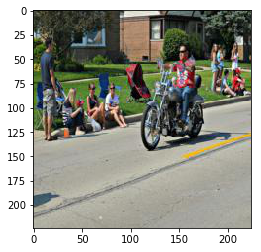

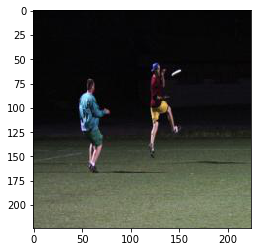

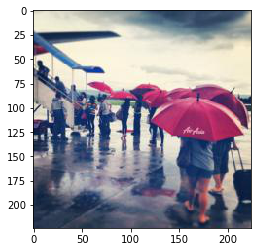

larg slice angel food cake sit top plate small plate contain larg slice cake quarter cake plate larg piec yellow cake sit plate larg slab spong cake sit upon floweri plate
1 ['589.jpg' '1714.jpg' '818.jpg' '1753.jpg' '1199.jpg' '149.jpg' '457.jpg'
 '833.jpg' '1916.jpg' '355.jpg' '158.jpg' '1054.jpg' '80.jpg' '1507.jpg'
 '1147.jpg' '14.jpg' '201.jpg' '200.jpg' '1143.jpg' '392.jpg']


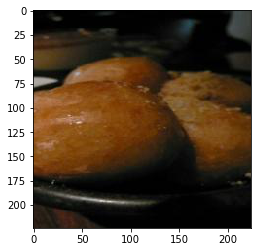

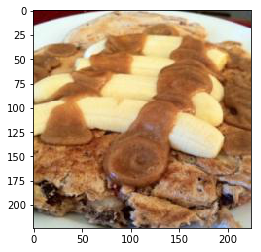

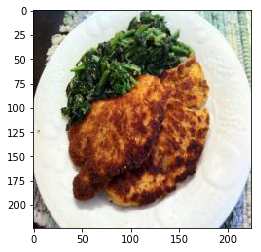

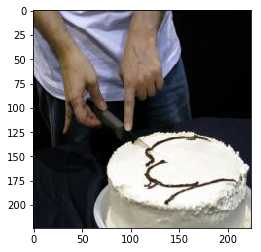

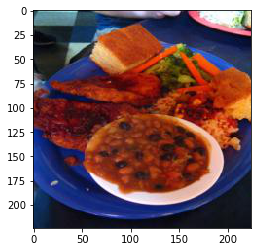

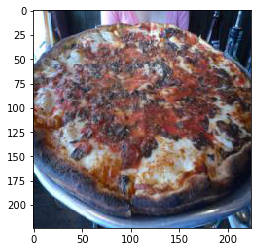

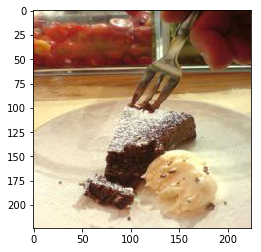

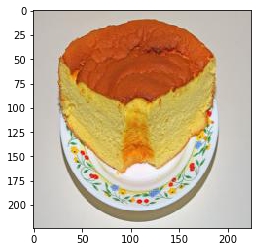

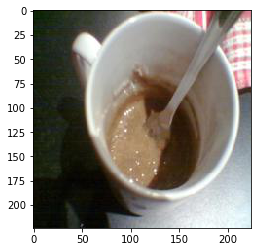

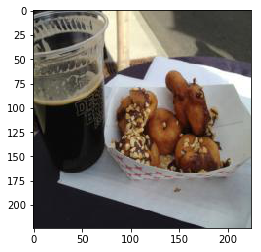

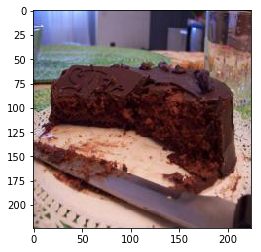

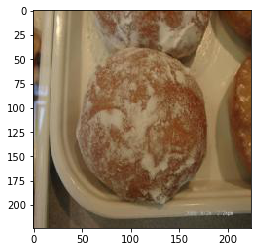

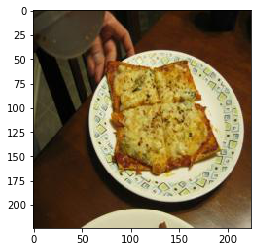

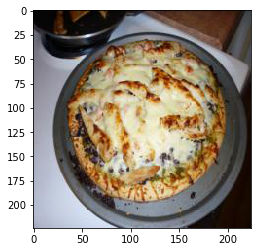

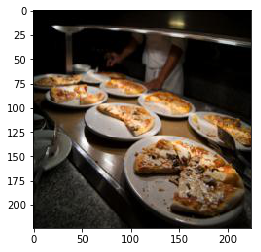

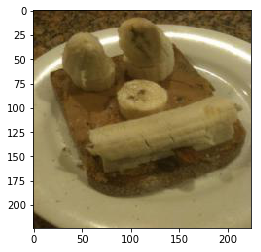

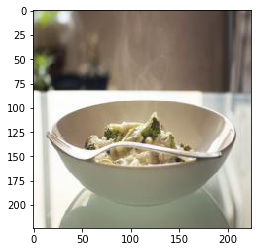

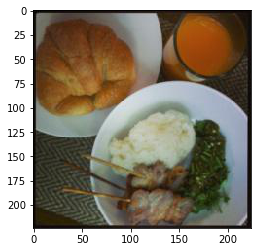

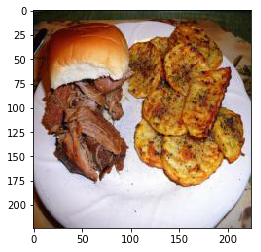

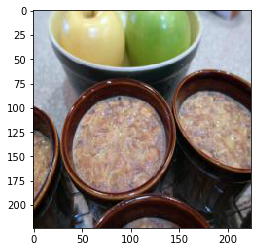

group traffic light sit intersect sign shine street light pictur stoplight window sun surround airplan traffic light sever street light airplan fli overhead
2 ['838.jpg' '1183.jpg' '696.jpg' '634.jpg' '1724.jpg' '445.jpg' '1471.jpg'
 '1866.jpg' '159.jpg' '720.jpg' '42.jpg' '496.jpg' '825.jpg' '600.jpg'
 '904.jpg' '1840.jpg' '283.jpg' '1242.jpg' '117.jpg' '323.jpg']


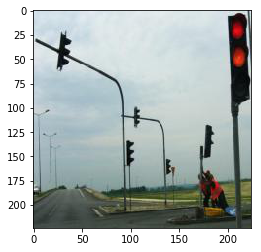

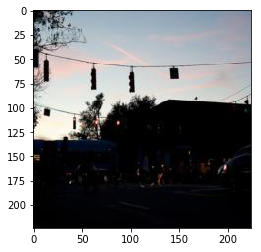

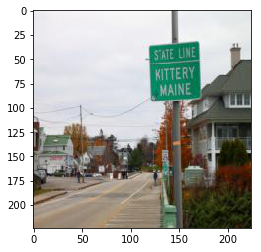

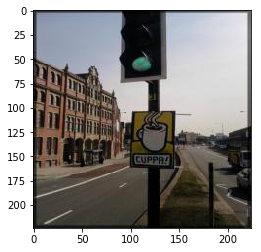

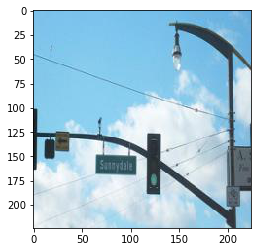

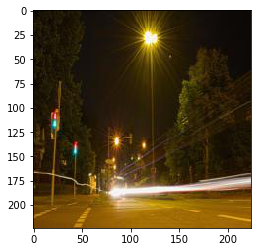

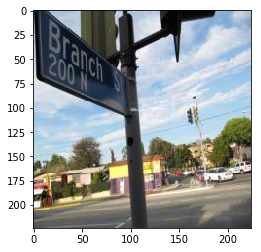

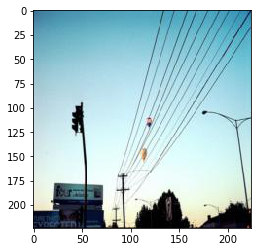

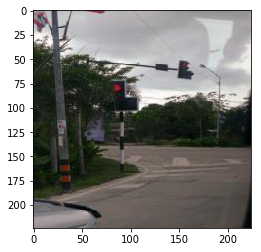

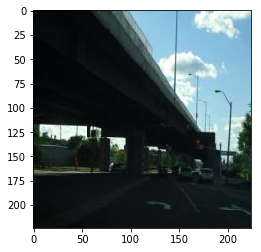

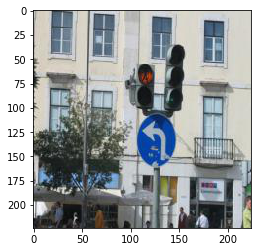

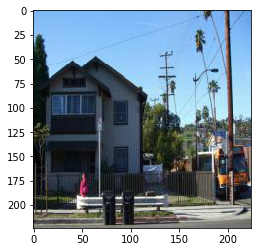

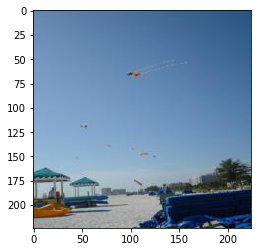

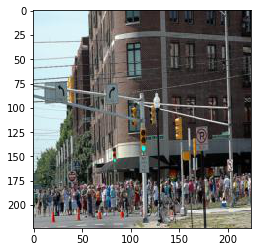

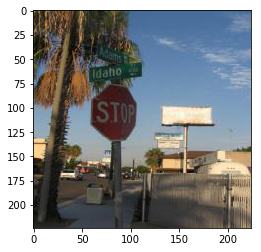

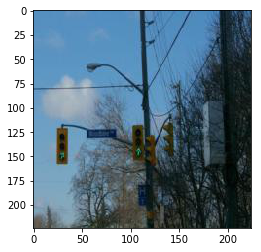

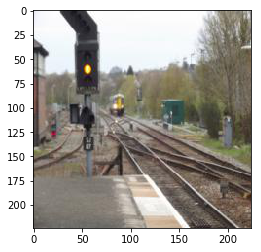

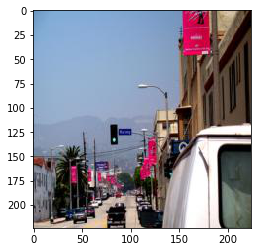

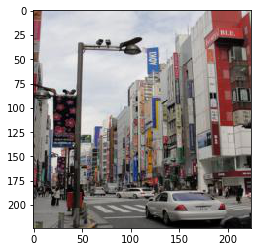

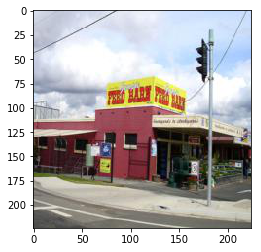

two mean uniform ride hors side side sandi beach two polic offic hors ride beach two peopl ride hors middl lot pair polic offic ride hors beach two peopl neon vest ride hors beach
3 ['1315.jpg' '1035.jpg' '1513.jpg' '1609.jpg' '75.jpg' '1850.jpg' '1769.jpg'
 '66.jpg' '1755.jpg' '305.jpg' '153.jpg' '432.jpg' '397.jpg' '1394.jpg'
 '1486.jpg' '427.jpg' '1185.jpg' '1760.jpg' '1112.jpg' '799.jpg']


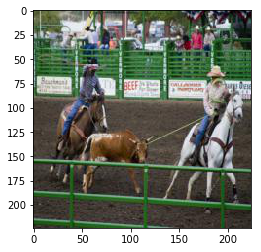

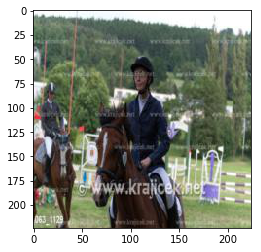

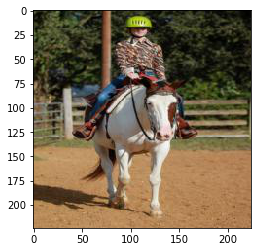

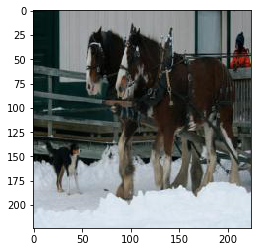

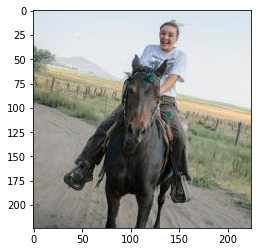

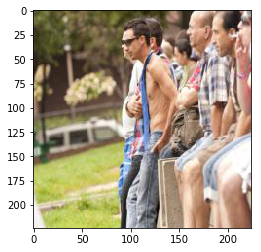

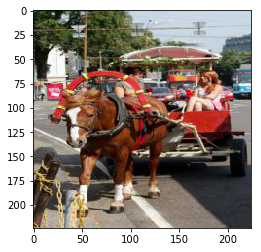

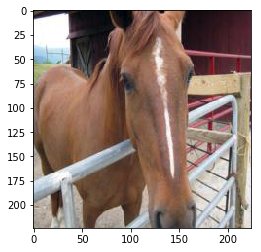

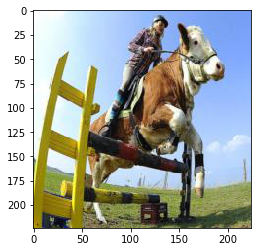

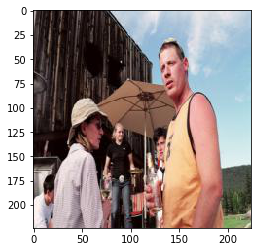

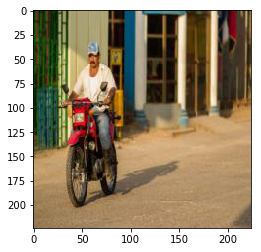

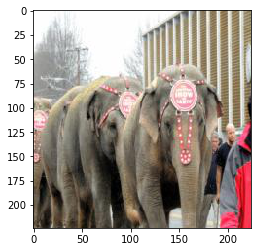

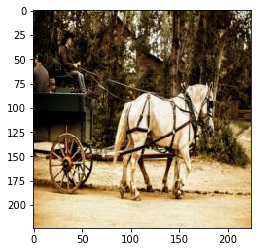

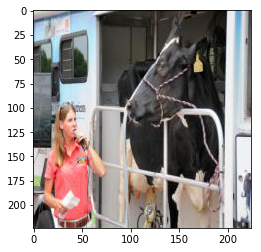

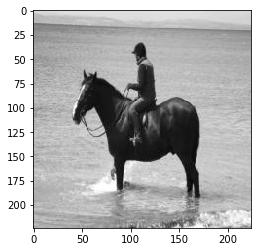

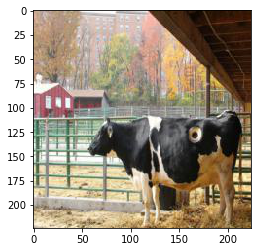

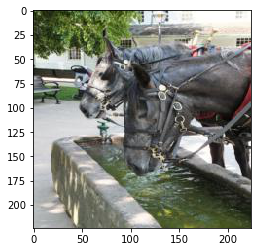

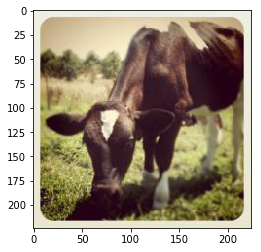

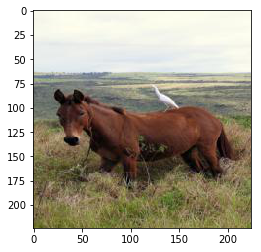

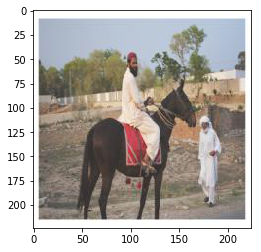

In [353]:
from PIL import Image
import matplotlib.pyplot as plt


def display_sample_pred():
    for index in range(4):
        top = get_top_20(index)
        print (test_desc[index])
        print(index, top)
        for image in top:
            img = Image.open('data/images_test/' + image)
            img = np.asarray(img)
            plt.imshow(img)
            plt.show()

display_sample_pred()

In [354]:
import csv

def write_submissions(output_filename):
    output_file = open(output_filename, "w")
    writer = csv.writer(output_file)
    #write headers
    writer.writerow(["Descritpion_ID", "Top_20_Image_IDs"])
    # get top 20 images for each test description
    for index in range(len(test_desc_features)):
        if (index % 100 == 0):
            print (index)
        images = " ".join(get_top_20(index))
        writer.writerow([str(index) + ".txt", images])

write_submissions('sample_submission.csv')

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
